<a href="https://www.kaggle.com/taha3012000/medical-cost-personal?scriptVersionId=89255842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

If there are duplicate values, use the following two cells
"They are not needed here"

In [6]:
#data.duplicated().sum()

In [7]:
#data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1338, 7)

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Visualization for data analysis**

Age does not have much effect on charges

In [10]:
fig = px.scatter(data, x="age", y="charges")
fig.show()

If BMI >30, Charges increase

In [11]:
fig = px.scatter(data, x="bmi", y="charges")
fig.show()

Men smoke more than non-smokers and therefore pay more for treatment costs

Guess: because the common disease among them is lung cancer or asthma


Women who do not smoke more than women who smoke, and they pay more for treatment costs


Guess: because the most common disease among them is breast cancer

In [12]:
fig = px.bar(data, x="sex", y="charges", color="smoker", barmode="group")
fig.show()

The southeast is higher in treatment costs than the rest of the regions

In [13]:
fig = px.bar(data, x="region", y="charges", barmode="group")
fig.show()

Those who do not have children have higher costs of treatment than those who do


Guess: It may be that they spend more on treating diseases that cause problems in having children

In [14]:
fig = px.bar(data, x="children", y="charges",barmode="group")
fig.show()

In [15]:
fig = px.scatter_matrix(data, color="charges",width=1000, height=1000)
fig.show()

**Preprocessing**

Convert numerical features to categories

In [16]:
mapp={'female':0,'male':1}
data['sex']=data['sex'].map(mapp)

In [17]:
mapp1={'no':0,'yes':1}
data['smoker']=data['smoker'].map(mapp1)

In [18]:
mapp2={'southeast':0,'southwest':1,'northeast':2,'northwest':3}
data['region']=data['region'].map(mapp2)

In [19]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [20]:
data.loc[data['age']<=30,'age']=0
data.loc[(data['age']>30)&(data['age']<=45),'age']=1
data.loc[(data['age']>45)&(data['age']<=60),'age']=2
data.loc[data['age']>60,'age']=3
data['age']=data['age'].astype(int)

Another way to convert numerical features to categorical

In [21]:
#data['sex'] = data['sex'].astype('category').cat.codes
#data['smoker'] = data['smoker'].astype('category').cat.codes
#data['region'] = data['region'].astype('category').cat.codes

handling outliers

In [22]:
outlier_percentage = {}
for feature in ['bmi']:
    tempData = data.sort_values(by='bmi')['bmi']
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage['bmi'] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'bmi': 0.67}

In [23]:
outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)


In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0,0,27.900,0,1,1,16884.92400
1,0,1,33.770,1,0,0,1725.55230
2,0,1,33.000,3,0,0,4449.46200
3,1,1,22.705,0,0,3,21984.47061
4,1,1,28.880,0,0,3,3866.85520


correlation

<AxesSubplot:>

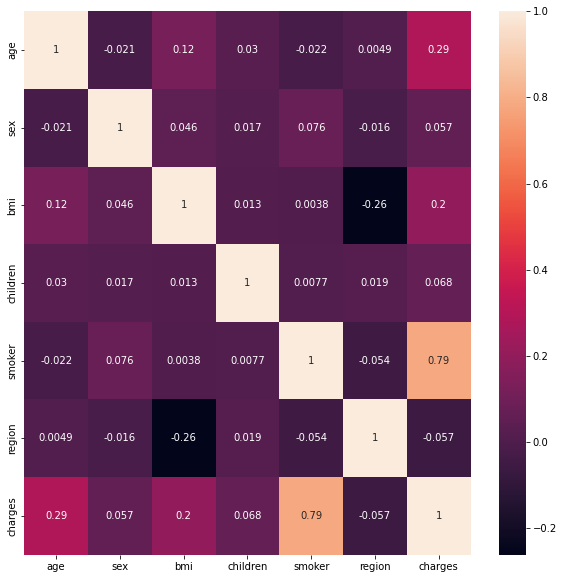

In [25]:
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

Feature selection

In [26]:
X=data.drop('charges',axis=1)
y=data['charges']

In [27]:
from sklearn.feature_selection import SelectKBest,f_regression
best=SelectKBest(score_func=f_regression,k='all')
fit=best.fit(X,y)
dfScores=pd.DataFrame(fit.scores_)
dfCol=pd.DataFrame(X.columns)
featScore=pd.concat([dfCol,dfScores],axis=1)
featScore.columns=['Feature','Score']
featScore=featScore.sort_values(by='Score',ascending=False).reset_index(drop=True)
print(featScore.nlargest(6,'Score'))

    Feature        Score
0    smoker  2177.614868
1       age   119.318889
2       bmi    54.709308
3  children     6.206037
4       sex     4.399702
5    region     4.353706


**Modeling**

In [28]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression ,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from xgboost.sklearn import XGBRegressor

In [31]:
models = {'Linear Regression': LinearRegression(),
         'Lasso': Lasso(),
         'Decision Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(),
         'Gradient Boosting':GradientBoostingRegressor(),
         'Ridge': Ridge(),
         'Stochastic Gradien Descent': SGDRegressor(),
         'Elastic': ElasticNet(),
         'xgb Regressor': XGBRegressor()}

In [32]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='neg_mean_squared_error',
                                            cv=3
                                            ).mean()

    return model_scores

The lowest in mse is Random forest

In [33]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Linear Regression': -38188317.2307817,
 'Lasso': -38186641.320644565,
 'Decision Tree': -39660316.97380576,
 'Random Forest': -25104128.992845893,
 'Gradient Boosting': -26527819.848179534,
 'Ridge': -38110771.952193625,
 'Stochastic Gradien Descent': -38157799.83702996,
 'Elastic': -49366916.75840781,
 'xgb Regressor': -29098379.255123194}

In [34]:
np.random.seed(42)
params={
        'criterion':['mse', 'mae'],
         'max_features':['auto','sqrt','log2'],
        'max_depth':[2,3,10]
       }
rs = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=params,
                                cv=3,
                                n_iter=30,
                                verbose=0,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

{'max_features': 'auto', 'max_depth': 3, 'criterion': 'mse'}

In [35]:
rs.best_estimator_

RandomForestRegressor(max_depth=3)

In [36]:
rs.score(X_test, y_test)

0.8626015537461467

In [37]:
model = RandomForestRegressor(max_features='auto', max_depth= 3, criterion='mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.8635946641421174

In [39]:
vot=VotingRegressor([('LinearRegression',LinearRegression()),('DecisionTrees',DecisionTreeRegressor()),('LassoRegression',Lasso()),
                     ('RandomForest',RandomForestRegressor()),('ElasticNet',ElasticNet()),
                     ('StochasticGradientDescent',SGDRegressor()),
                    ('GrafientBoosting',GradientBoostingRegressor()),('Ridge',Ridge()),('xgb',XGBRegressor())])
vot.fit(X_train,y_train)
y_pred1=vot.predict(X_test)

In [40]:
-mean_squared_error(y_test,y_pred1)


-24537617.706456404

As expected, Voting has highest accuracy

In [41]:
rs.score(X_test, y_pred1)

0.9226543797687141